In [1]:
# Data Manipulation
import pandas as pd
import numpy as np
import random 

# set display options
pd.options.display.float_format = "{:,.4f}".format
pd.set_option('display.max_columns', 100)

# Visualizaiton
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
sns.set(rc={'figure.figsize': (20, 8)})

# Cointegration test
from statsmodels.tsa.vector_ar.vecm import coint_johansen

# Robust analysis
import statsmodels.api as sm

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load stock price data
AdjClose = pd.read_excel('StockPrice.xlsx', skiprows=[1], index_col=0, parse_dates=True)
AdjClose.index.name = 'date'
AdjClose.head()

,VALE3,ITUB4,PETR4,PETR3,BBDC4,B3SA3,ABEV3,ELET3,WEGE3,RENT3,BBAS3,ITSA4,SUZB3,GGBR4,BPAC11,EQTL3,PRIO3,RDOR3,RADL3,JBSS3,RAIL3,HAPV3,LREN3,CSAN3,BBSE3,BBDC3,SBSP3,ENEV3,VBBR3,HYPE3,CMIG4,VIVT3,TOTS3,ASAI3,UGPA3,KLBN11,ELET6,CCRO3,CPLE6,ENGI11,TIMS3,BRFS3,EGIE3,EMBR3,SANB11,MGLU3,NTCO3,GOAU4,CSNA3,CRFB3,...,PRML3,RCTB31,RCTB41,RDCD3,RSID3,RUMO3,ALLL3,ALLL11,SDIA4,SAPR11,SHAP4,CSTB4,SMLS3,CRUZ3,SUBA3,SUZB5,SYNE3,TAMM4,TCOC4,TLCP4,TNEP4,TSEP4,TELB3,TELB4,VIVT4,nan.3,nan.4,TNLP3,TNLP4,TMAR5,TMAR6,TMCP4,TRJC6,TSPC3,TSPC6,LAND3,TCSL4,TPRC6,TRPL4,UGPA4,UBBR11,UNIP6,USIM3,USIM6,VALE5,VVAR11,VIVO3,VIVO4,BRDT4,WHMT3
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1994-12-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1995-01-02,0.6337,0.1029,0.1976,0.1548,0.1364,NaN,0.0639,4.4640,NaN,NaN,NaN,0.0349,NaN,0.1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1263,NaN,NaN,NaN,NaN,0.1548,0.9488,NaN,NaN,NaN,NaN,2.1398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1394,0.0807,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5342,NaN,0.0022,0.0081,NaN,0.1452,NaN,1.9137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5212,NaN,NaN,NaN,NaN,NaN,12.7659,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1852,NaN,NaN,0.5726,NaN,NaN,NaN,0.0189,1.9367
1995-01-03,0.6337,0.0990,0.1863,0.1487,0.1270,NaN,0.0642,4.1526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1226,NaN,NaN,NaN,NaN,0.1428,0.9416,NaN,NaN,NaN,NaN,1.9775,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1310,0.0764,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5253,NaN,0.0022,0.0078,NaN,0.1456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.5074,NaN,NaN,NaN,NaN,NaN,12.6357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1844,NaN,NaN,0.5513,NaN,NaN,NaN,0.0181,1.9213
1995-01-04,0.6222,0.0938,0.1788,0.1437,0.1242,NaN,NaN,4.0191,NaN,NaN,0.8907,0.0331,NaN,0.1391,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1161,NaN,NaN,NaN,NaN,0.1428,0.9201,NaN,NaN,NaN,NaN,1.9701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1338,0.0716,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4897,NaN,0.0021,0.0074,NaN,0.1374,NaN,1.8411,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4383,NaN,NaN,NaN,NaN,NaN,11.7238,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1743,NaN,NaN,0.5370,NaN,NaN,NaN,0.0175,1.8214
1995-01-05,0.6107,0.0945,0.1806,NaN,0.1242,NaN,0.0642,4.2564,NaN,NaN,0.9040,0.0328,NaN,0.1364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1152,NaN,NaN,NaN,NaN,0.1488,0.9524,NaN,NaN,NaN,NaN,2.0808,NaN,NaN,NaN,NaN,NaN,NaN,2.9355,NaN,NaN,NaN,0.1338,0.0721,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.4719,NaN,0.0021,0.0075,NaN,0.1410,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.4446,NaN,NaN,NaN,NaN,NaN,10.9422,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1747,0.8638,NaN,0.5548,NaN,NaN,NaN,0.0171,1.7830


In [3]:
# Load Ibovespa market composition
MarketComposition = pd.read_excel("MarketComposition.xlsx")
MarketComposition.head()

,Date,Symbols
0,1997-12-31,ITUB4
1,1997-12-31,PETR4
2,1997-12-31,BBDC4
3,1997-12-31,ELET3
4,1997-12-31,BBAS3


In [4]:
# Splitting in-sample and out-of-sample data
df = AdjClose.copy()

inSample = {}
outofSample = {}

update_date = pd.Timestamp('1998-01-01')
count = 1
while update_date <= pd.Timestamp('2024-01-01'):
    # In-sample is determined by market compostion date
    inSample_mask = (df.index > (update_date - pd.DateOffset(months=12))) & (df.index <= (update_date))
    inSample[count] = df.loc[inSample_mask]

    # Out-of-sample 
    outofSample_mask = (df.index > (update_date)) & (df.index <= (update_date + pd.DateOffset(months=6)))
    outofSample[count] = df.loc[outofSample_mask]

    # Update rule
    count += 1
    update_date += pd.DateOffset(months=6)

# In-sample tail
print("In-sample tail:\n", inSample[1].iloc[:, :5].tail())

# Out-of-sample head
print("Out-of-sample head:\n", outofSample[1].iloc[:, :5].head())

In-sample tail:
             VALE3  ITUB4  PETR4  PETR3  BBDC4
date                                         
1997-12-26 0.3894 0.2584 0.5035 0.5144 0.3211
1997-12-29 0.4108 0.2686 0.5241 0.5169 0.3445
1997-12-30    NaN 0.2925 0.5365 0.4806 0.3679
1997-12-31    NaN    NaN    NaN    NaN    NaN
1998-01-01    NaN    NaN    NaN    NaN    NaN
Out-of-sample head:
             VALE3  ITUB4  PETR4  PETR3  BBDC4
date                                         
1998-01-02 0.4186 0.3050 0.5519 0.5326 0.3683
1998-01-05    NaN 0.3270 0.5601 0.5222 0.3516
1998-01-06    NaN 0.3099 0.5447 0.4910 0.3348
1998-01-07 0.4089 0.2977 0.5283 0.4858 0.3248
1998-01-08    NaN 0.2831 0.5139 0.4884 0.2997


In [5]:
# Keep only stocks from the Bovespa index
for index, date in enumerate(MarketComposition['Date'].unique().tolist()):
    # Select symbols from market compostion
    symbols = MarketComposition.loc[MarketComposition['Date'] == date, 'Symbols'].tolist()
    # Filter stocks and clean data
    inSample[index+1] = inSample[index+1][symbols].ffill()
    inSample[index+1] = inSample[index+1].dropna(axis=1, how='any')
    outofSample[index+1] = outofSample[index+1][inSample[index+1].columns].fillna(method='pad') # handle delisted stocks

# In-sample tail
print("In-sample tail:\n", inSample[1].iloc[:, :5].tail())

# Out-of-sample head
print("Out-of-sample head:\n", outofSample[1].iloc[:, :5].head())

In-sample tail:
             ITUB4  PETR4  BBDC4  ELET3  ITSA4
date                                         
1997-12-26 0.2584 0.5035 0.3211 8.3149 0.0537
1997-12-29 0.2686 0.5241 0.3445 8.4704 0.0590
1997-12-30 0.2925 0.5365 0.3679 8.6258 0.0658
1997-12-31 0.2925 0.5365 0.3679 8.6258 0.0658
1998-01-01 0.2925 0.5365 0.3679 8.6258 0.0658
Out-of-sample head:
             ITUB4  PETR4  BBDC4  ELET3  ITSA4
date                                         
1998-01-02 0.3050 0.5519 0.3683 8.7812 0.0635
1998-01-05 0.3270 0.5601 0.3516 8.7035 0.0635
1998-01-06 0.3099 0.5447 0.3348 8.1595 0.0643
1998-01-07 0.2977 0.5283 0.3248 7.9264 0.0635
1998-01-08 0.2831 0.5139 0.2997 7.5378 0.0597


In [6]:
class Johansen:
    """
    This class performs the Johansen cointegration test and provides related calculations.
    
    Attributes:
    data : array-like
        Time series data for the cointegration test.
    det_order : int, optional
        Order of deterministic terms in the cointegration test.
    k_ar_diff : int, optional
        Number of lags to include in the cointegration test.
    ct : JohansenTestResult, optional
        Result of the cointegration test.
    """
    
    def __init__(self, data, det_order=0, k_ar_diff=1):
        """
        Initializes the Johansen class with the provided parameters.
        
        Parameters:
        data : array-like
            Time series data for the cointegration test.
        det_order : int, optional
            Order of deterministic terms in the cointegration test.
        k_ar_diff : int, optional
            Number of lags to include in the cointegration test.
        """
        self.data = data
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.ct = coint_johansen(self.data, det_order=self.det_order, k_ar_diff=self.k_ar_diff)

    def n_coint_vectors(self):
        """
        Calculates the number of cointegrated vectors based on the cointegration test result.
        
        Returns:
        n_vectors : int
            Number of cointegrated vectors.
        """
        return len(np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0])

    def beta(self):
        """
        Calculates the cointegrated eigenvectors (beta) based on the cointegration test result.
        
        Returns:
        beta : array-like
            Cointegrated eigenvectors.
        """
        return self.ct.evec[:, np.where(self.ct.lr2 > self.ct.cvm[:, 1])[0]]

    def alpha(self):
        """
        Calculates the estimated alpha matrix based on the cointegration test result.
        
        Returns:
        alpha : array-like
            Estimated alpha matrix.
        """
        r0t = np.transpose(self.ct.r0t)
        r1t = np.transpose(self.ct.rkt)

        S01 = np.dot(r0t, r1t.T) / r0t.shape[1]
        S11 = np.dot(r1t, r1t.T) / r0t.shape[1]

        beta = self.beta()
        return S01 @ beta @ np.linalg.inv(beta.T @ S11 @ beta)

    def Phi(self):
        """
        Calculates the Phi matrix based on the cointegration test result.
        
        Returns:
        Phi : array-like
            Phi matrix.
        """
        return np.dot(self.alpha(), self.beta().T)

    def residuals(self):
        """
        Calculates the residuals based on the cointegration test result.
        
        Returns:
        residuals : array-like
            Residuals.
        """
        return np.dot(self.Phi(), self.data.T)

In [7]:
class Backtest:
    def __init__(self, inSample, outofSample, entry_point = 2, exit_point=0, stop_loss=None,det_order=0, k_ar_diff=1):
        """
        Initializes the Backtest class.

        Parameters:
        data : DataFrame
            DataFrame containing the financial data.
        det_order : int, optional
            Order of deterministic components in the cointegration test (default is 0).
        k_ar_diff : int, optional
            Number of lags to difference the data in the cointegration test (default is 1).
        """
        self.inSample = inSample
        self.outofSample = outofSample
        self.entry_point = entry_point
        self.exit_point = exit_point
        self.stop_loss = stop_loss
        self.det_order = det_order
        self.k_ar_diff = k_ar_diff
        self.johansen = Johansen(inSample, det_order, k_ar_diff)
        self._hedge_ratio = self.hedge_ratio()

    def hedge_ratio(self):
        """
        Calculates the hedge ratio (Phi) based on the Johansen cointegration analysis.

        Returns:
        hedge_ratio : array-like
            Hedge Ratios.
        """
        HR = self.johansen.beta().T

        return HR / HR[0]
    
    def weight(self):
        """
        Calculates the weights for each asset in the portfolio.

        Returns:
        weights : array-like
            Portfolio weights.
        """

        return np.round(self._hedge_ratio / np.sum(self._hedge_ratio), 2)[0]

    def spread(self):
        """
        Calculates the spread based on the hedge ratio and the financial data.

        Returns:
        spread : array-like
            Spread.
        """
        return np.nan_to_num(np.dot(self._hedge_ratio , self.outofSample.T))[0]

    def z_score(self):
        """
        Calculates the z-score of the spread.

        Returns:
        z_score : DataFrame
            Z-scores.
        """
        mean = np.mean(self.spread())
        std = np.std(self.spread())

        return (self.spread() - mean) / std
    
    def signal(self):
        """
        Generates trading signals based on the calculated z-score.

        Returns:
        signals : DataFrame
            DataFrame containing the generated trading signals (1: long, -1: short, 0: no signal).
        """
        position = 0
        signals = []
        z_score = self.z_score()

        # Loop through the data to generate signals
        for i in range(0, len(z_score)):
            t = z_score[i]

            # Generate signals based on z-score values
            # Entry points
            if t <= -self.entry_point and position == 0:
                position = 1  # open position
                signals.append(position)
            elif t >= self.entry_point and position == 0:
                position = -1  # open position
                signals.append(position)
            # Exit points
            elif t >= -self.exit_point and (position == 1 or position == 2):
                position = 0  # close position
                signals.append(position)
            elif t <= self.exit_point and (position == -1 or position == -2):
                position = 0  # close position
                signals.append(position)
            # Stop loss
            elif self.stop_loss is not None:
                if t <= -self.stop_loss and position == 1:
                    position = 2  # close position
                    signals.append(position)
                elif t >= self.stop_loss and position == -1:
                    position = -2  # close position
                    signals.append(position)
                # Hold signal
                else:
                    signals.append(position)   
            # Hold signal
            else:
                signals.append(position)

        return pd.DataFrame({"Signal": signals}, index=self.outofSample.index).shift(1)

    def port_rtn(self):
        """
        Calculates the daily returns of the portfolio based on the generated signals.

        Returns:
        port_returns : DataFrame
            DataFrame containing the calculated daily portfolio returns.
        """
        stock_rtn = np.log(self.outofSample).diff().fillna(0)
        port_rtn = []
        signal = self.signal()

        # Loop through the data to calculate portfolio returns
        for i in range(0, len(self.outofSample)):
            if signal.iloc[i, 0] == 1:
                rtn = np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            elif signal.iloc[i, 0] == -1:
                rtn = - np.dot(self.weight(), stock_rtn.iloc[i]) - 0.0003 # minus transaction costs
            else:
                rtn = 0

            port_rtn.append(rtn)

        return pd.DataFrame({"Returns": port_rtn}, index=self.outofSample.index)


In [8]:
class Performance:
    def __init__(self, portfolio, benchmark=None):
        """
        Initializes the Performance class with portfolio returns and an optional benchmark.

        Parameters:
        portfolio : pandas.Series
            Time series of portfolio returns.
        benchmark : pandas.Series, optional
            Time series of benchmark returns (default is None).
        """
        self.portfolio = portfolio
        self.benchmark = benchmark

    def annual_rtn(self):
        """
        Calculates the annualized returns of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the annualized portfolio returns and benchmark returns.
        """
        _portfolio = round(100 * (np.mean(self.portfolio) * 252), 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.mean(self.benchmark) * 252), 2)
        return _portfolio, _benchmark

    def annual_std(self):
        """
        Calculates the annualized standard deviation of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the annualized portfolio standard deviation and benchmark standard deviation.
        """
        _portfolio = round(100 * (np.std(self.portfolio) * np.sqrt(252)), 2)[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(100 * (np.std(self.benchmark) * np.sqrt(252)), 2)[0]
        return _portfolio, _benchmark

    def sharpe_ratio(self):
        """
        Calculates the Sharpe ratio of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the Sharpe ratio of the portfolio and benchmark.
        """
        _portfolio = round(self.annual_rtn()[0] / self.annual_std()[0], 2)
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.annual_rtn()[1] / self.annual_std()[1], 2)
        return _portfolio, _benchmark

    def sortino_ratio(self):
        """
        Calculates the Sortino ratio of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the Sortino ratio of the portfolio and benchmark.
        """
        _portfolio_downside = round(100 * (np.std(self.portfolio[self.portfolio < 0]) * np.sqrt(252)), 2)
        _portfolio = round(self.annual_rtn()[0] / _portfolio_downside, 2)[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark_downside = round(100 * (np.std(self.benchmark[self.benchmark < 0]) * np.sqrt(252)), 2)
            _benchmark = round(self.annual_rtn()[1] / _benchmark_downside, 2)[0]
        return _portfolio, _benchmark

    def annual_VaR(self):
        """
        Calculates the annualized Value at Risk (VaR) of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the annualized portfolio VaR and benchmark VaR.
        """
        _portfolio = round(self.portfolio.quantile(0.05) * np.sqrt(252), 2)[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark = round(self.benchmark.quantile(0.05) * np.sqrt(252), 2)[0]
        return _portfolio, _benchmark

    def annual_CVaR(self):
        """
        Calculates the annualized Conditional Value at Risk (CVaR) of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the annualized portfolio CVaR and benchmark CVaR.
        """
        _portfolio = round(self.portfolio[self.portfolio < self.portfolio.quantile(0.05)].mean() * np.sqrt(252), 2)[0]
        _benchmark = None
        if self.benchmark is not None:
            _benchmark =  round(self.benchmark[self.benchmark < self.benchmark.quantile(0.05)].mean() * np.sqrt(252), 2)[0]
        return _portfolio, _benchmark

    def worst_drawdown(self):
        """
        Calculates the worst drawdown of the portfolio and benchmark.

        Returns:
        tuple
            Tuple containing the worst drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)
        _portfolio_worst_drawdown = round(_portfolio_drawdown.min(), 2)[0]

        _benchmark_worst_drawdown = None
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            _benchmark_worst_drawdown = round(_benchmark_drawdown.min(), 2)[0]

        return _portfolio_worst_drawdown, _benchmark_worst_drawdown

    def plot_performance(self):
        """
        Plots the cumulative returns and drawdown of the portfolio and benchmark.
        """
        _portfolio_cum_rtn = self.portfolio.cumsum()
        _portfolio_max_rtn = _portfolio_cum_rtn.cummax()
        _portfolio_drawdown = (_portfolio_cum_rtn - _portfolio_max_rtn) / (1 + _portfolio_max_rtn)

        fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
        
        # Plot cumulative returns for portfolio
        ax1.plot(_portfolio_cum_rtn.index, _portfolio_cum_rtn, label='Portfolio Cumulative Returns', color='blue')

        # Plot cumulative returns for benchmark if available
        if self.benchmark is not None:
            _benchmark_cum_rtn = self.benchmark.cumsum()
            ax1.plot(_benchmark_cum_rtn.index, _benchmark_cum_rtn, label='Benchmark Cumulative Returns', color='green')

        ax1.set_ylabel('Cumulative Returns')
        ax1.legend()

        # Plot drawdown for portfolio
        ax2.plot(_portfolio_drawdown.index, _portfolio_drawdown.values, color='red', label='Portfolio Drawdown')

        # Plot drawdown for benchmark if available
        if self.benchmark is not None:
            _benchmark_max_rtn = _benchmark_cum_rtn.cummax()
            _benchmark_drawdown = (_benchmark_cum_rtn - _benchmark_max_rtn) / (1 + _benchmark_max_rtn)
            ax2.plot(_benchmark_drawdown.index, _benchmark_drawdown.values, color='orange', label='Benchmark Drawdown')

        ax2.set_ylabel('Drawdown (%)')
        ax2.legend()

        # Set x-axis label only on the bottom subplot
        ax2.set_xlabel('Date')

        # Customize background
        fig.set_facecolor('white')
        ax1.set_facecolor('white')
        ax2.set_facecolor('white')
        ax1.grid(color='black', linestyle='--', linewidth=0.2)
        ax2.grid(color='black', linestyle='--', linewidth=0.2)

        plt.show()


    def summary_table(self):
        """
        Generates a summary table with various performance metrics of the portfolio and benchmark.

        Returns:
        pandas.DataFrame
            DataFrame containing the summary metrics.
        """
        metrics = pd.DataFrame({
            'portfolio': {'Annualized Returns': self.annual_rtn()[0],
                          'Annualized Standard Deviation': self.annual_std()[0],
                          'Sharpe Ratio': self.sharpe_ratio()[0],
                          'Sortino Ratio': self.sortino_ratio()[0],
                          'Annualized VaR 95%': self.annual_VaR()[0],
                          'Annualized CVaR 95%': self.annual_CVaR()[0],
                          'Worst Drawdown': self.worst_drawdown()[0]},
            'benchmark': {'Annualized Returns': self.annual_rtn()[1],
                          'Annualized Standard Deviation': self.annual_std()[1],
                          'Sharpe Ratio': self.sharpe_ratio()[1],
                          'Sortino Ratio': self.sortino_ratio()[1],
                          'Annualized VaR 95%': self.annual_VaR()[1],
                          'Annualized CVaR 95%': self.annual_CVaR()[1],
                          'Worst Drawdown': self.worst_drawdown()[1]}
            })
        
        return metrics

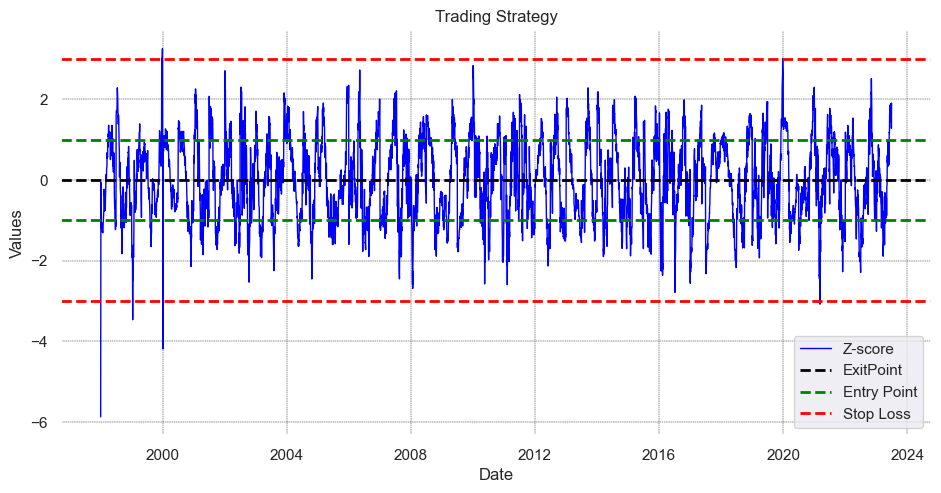

In [9]:
# Define an empty dictionary to store the results
strategy = {}
portfolio = {}

for i in range(1, len(inSample)):
    # Set seed
    random.seed(2024)

    cointegrated = False

    while not cointegrated:
        # Select stocks randomly 
        selected_columns = random.sample(list(inSample[i].columns), 10)
        _inSample = inSample[i][selected_columns]
        _outofSample = outofSample[i][selected_columns]

        # Test for cointegration
        coint = Johansen(_inSample).n_coint_vectors()
        
        if coint >= 1:
            # Run backtest
            backtest = Backtest(inSample=_inSample, outofSample=_outofSample, entry_point=1, stop_loss=3)
            strategy[i] = pd.DataFrame({"Z-score": backtest.z_score()}, index=_outofSample.index)
            portfolio[i] = backtest.port_rtn()
            cointegrated = True
        else:
            # Set backtest to 0 or handle as needed
            portfolio[i] = pd.DataFrame([0] * len(_outofSample), index=_outofSample.index)

# concatenate all DataFrames into a single DataFrame
strategy = pd.concat(strategy.values(), axis=0)
portfolio = pd.concat(portfolio.values(), axis=0) 

# Plot z-score and signals
# Plotting
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(strategy.index, strategy.iloc[:,0], label='Z-score', color='blue', linewidth=1)
ax.axhline(y=0, color='black', linestyle='--', linewidth=2, label='ExitPoint')
ax.axhline(y=-1, color='green', linestyle='--', linewidth=2, label='Entry Point')
ax.axhline(y=1, color='green', linestyle='--',linewidth=2)
ax.axhline(y=-3, color='red', linestyle='--', linewidth=2, label='Stop Loss')
ax.axhline(y=3, color='red', linestyle='--', linewidth=2)
ax.set_ylabel('Values')
ax.set_xlabel('Date')
ax.set_facecolor('white')
ax.grid(color='black', linestyle='--', linewidth=0.3)
ax.set_title("Trading Strategy")
ax.legend()
plt.show()


In [10]:
# Load Ibovespa index
ibov = pd.read_excel('Ibovespa.xlsx', skiprows=1, index_col=0, parse_dates=True).dropna()
ibov.index.name = 'date'

# Set as benchmark return
benchmark = pd.DataFrame({'Benchmark': np.log(ibov['IBOV']).diff().dropna()})
benchmark = benchmark.loc[portfolio.index[0]:portfolio.index[-1]]
benchmark.head()

,Benchmark
date,
1998-01-02,0.0274
1998-01-05,0.0120
1998-01-06,-0.0406
1998-01-07,-0.0304
1998-01-08,-0.0227


In [11]:
performance = Performance(portfolio=portfolio, benchmark=benchmark)
performance.summary_table()

,portfolio,benchmark
Annualized Returns,23.1200,10.0900
Annualized Standard Deviation,21.0200,30.4700
Sharpe Ratio,1.1000,0.3300
Sortino Ratio,1.2500,0.4500
Annualized VaR 95%,-0.3100,-0.4600
Annualized CVaR 95%,-0.4900,-0.6900
Worst Drawdown,-0.3000,-0.8000


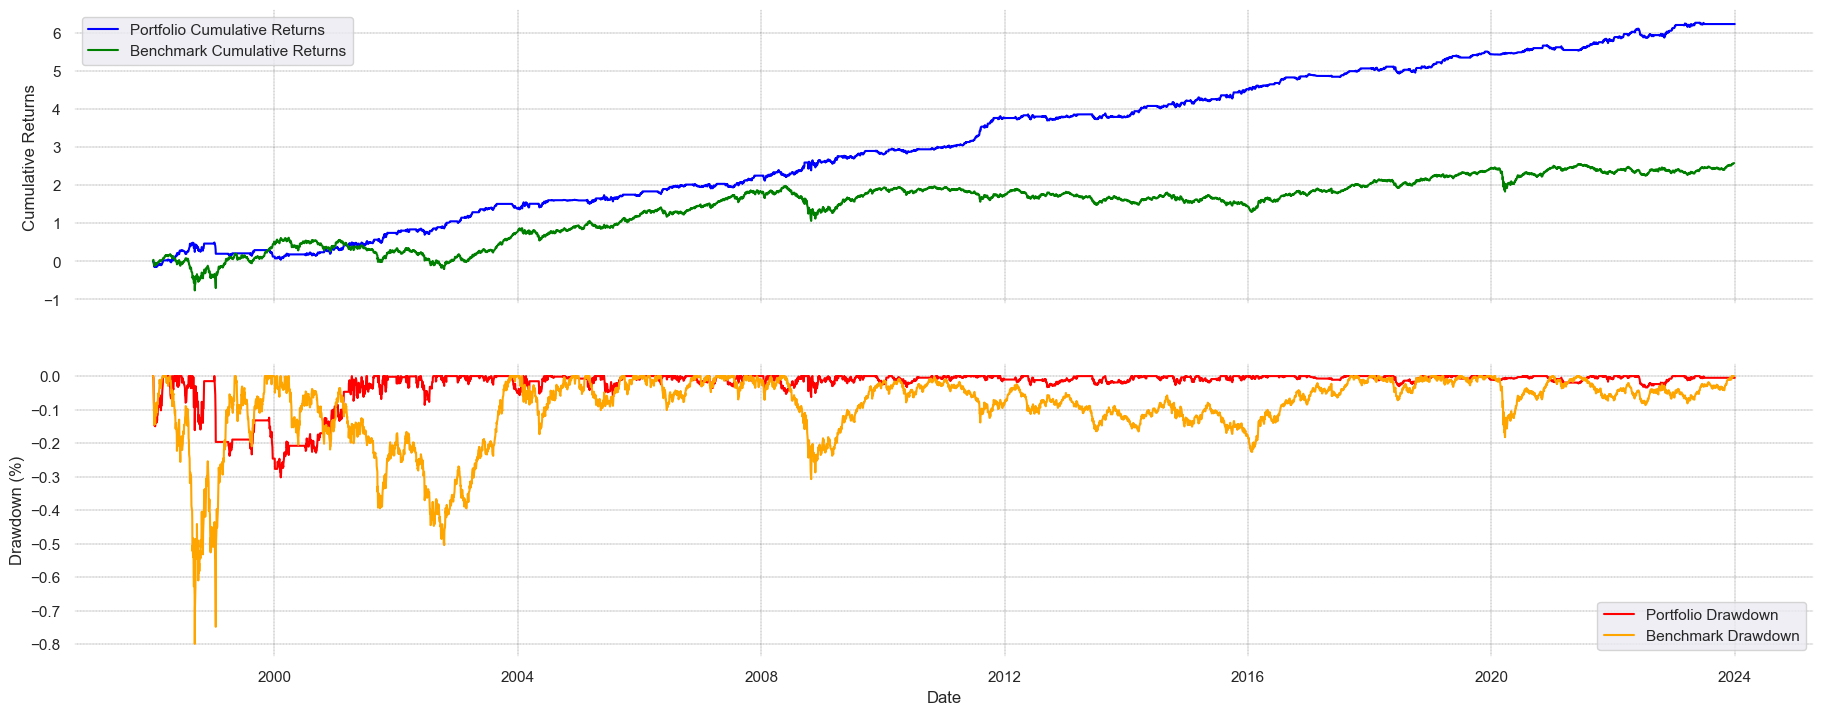

In [12]:
performance.plot_performance()

In [13]:
# Load Fama-French factors 
ff_factors = pd.read_csv('BR-Fama-French-Factors/FF_Factors.csv', index_col=0, parse_dates=True)
ff_factors = ff_factors.loc[portfolio.index[0]:portfolio.index[-1], ['RMRF', 'SMB', 'HML', 'RMW', 'CMA']]
ff_factors.head()

,RMRF,SMB,HML,RMW,CMA
date,,,,,
1998-07-01,0.0234,-0.0087,0.0159,-0.0007,-0.0026
1998-07-02,-0.0021,0.0058,0.0130,0.0107,-0.0066
1998-07-03,0.0207,-0.0134,-0.0151,-0.0012,0.0058
1998-07-06,-0.0104,-0.0030,-0.0060,-0.0099,0.0011
1998-07-07,0.0178,-0.0219,0.0189,0.0207,0.0075


In [14]:
# Merge portfolio and ff_factors
df = pd.merge(portfolio, ff_factors, left_index=True, right_index=True)
df.tail()

,Returns,RMRF,SMB,HML,RMW,CMA
date,,,,,,
2023-06-26,0.0113,-0.0067,-0.0084,-0.0032,0.0082,-0.0191
2023-06-27,0.0201,-0.0066,-0.0113,-0.0054,-0.0045,-0.0017
2023-06-28,0.0072,-0.0077,0.0025,0.0000,-0.0033,0.0077
2023-06-29,-0.0248,0.0140,0.0120,-0.0071,-0.0023,0.0079
2023-06-30,-0.0065,-0.0030,0.0029,-0.0032,-0.0147,0.0013


In [15]:
# Perform regression 
X = df.iloc[:,1:]
y = df.iloc[:,0]
model = sm.OLS(y, X).fit()

# Display the results
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                Returns   R-squared (uncentered):                   0.051
Model:                            OLS   Adj. R-squared (uncentered):              0.050
Method:                 Least Squares   F-statistic:                              66.64
Date:                Mon, 15 Jan 2024   Prob (F-statistic):                    5.11e-68
Time:                        15:57:44   Log-Likelihood:                          17939.
No. Observations:                6185   AIC:                                 -3.587e+04
Df Residuals:                    6180   BIC:                                 -3.583e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RMRF           0.1573      0.009     17.025      0.000       0.139       0.175
SMB           -0.0519      0.019     -2.675      0.007      -0.090      -0.014
HML            0.0400      0.017      2.366      0.018       0.007       0.073
RMW           -0.0491      0.017     -2.840      0.005      -0.083      -0.015
CMA            0.0175      0.018      0.994      0.320      -0.017       0.052
==============================================================================
Omnibus:                      951.836   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10823.817
Skew:                           0.363   Prob(JB):                         0.00
Kurtosis:                       9.440   Cond. No.                         2.40
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""